# Main Functions 

Welcome to MacroDensity's tutorial Jupyter Notebook. This notebook contains a few examples of how MacroDensity's basic functions are used. 

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ase.io.cube

import macrodensity as md

## Plotting the planar and macroscopic average 
We can calculate the planar and macroscopic potential average of a material using the function `md.plotting.plot_planar_average`. This function can post-process different output files, including `CHGCAR`, `LOCPOT`, `.cube` and `gulp.out`:

### Post-processing `VASP` `CHGCAR` and `LOCPOT`

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  8.000000069794417
Average of the average =  7.72953392288895


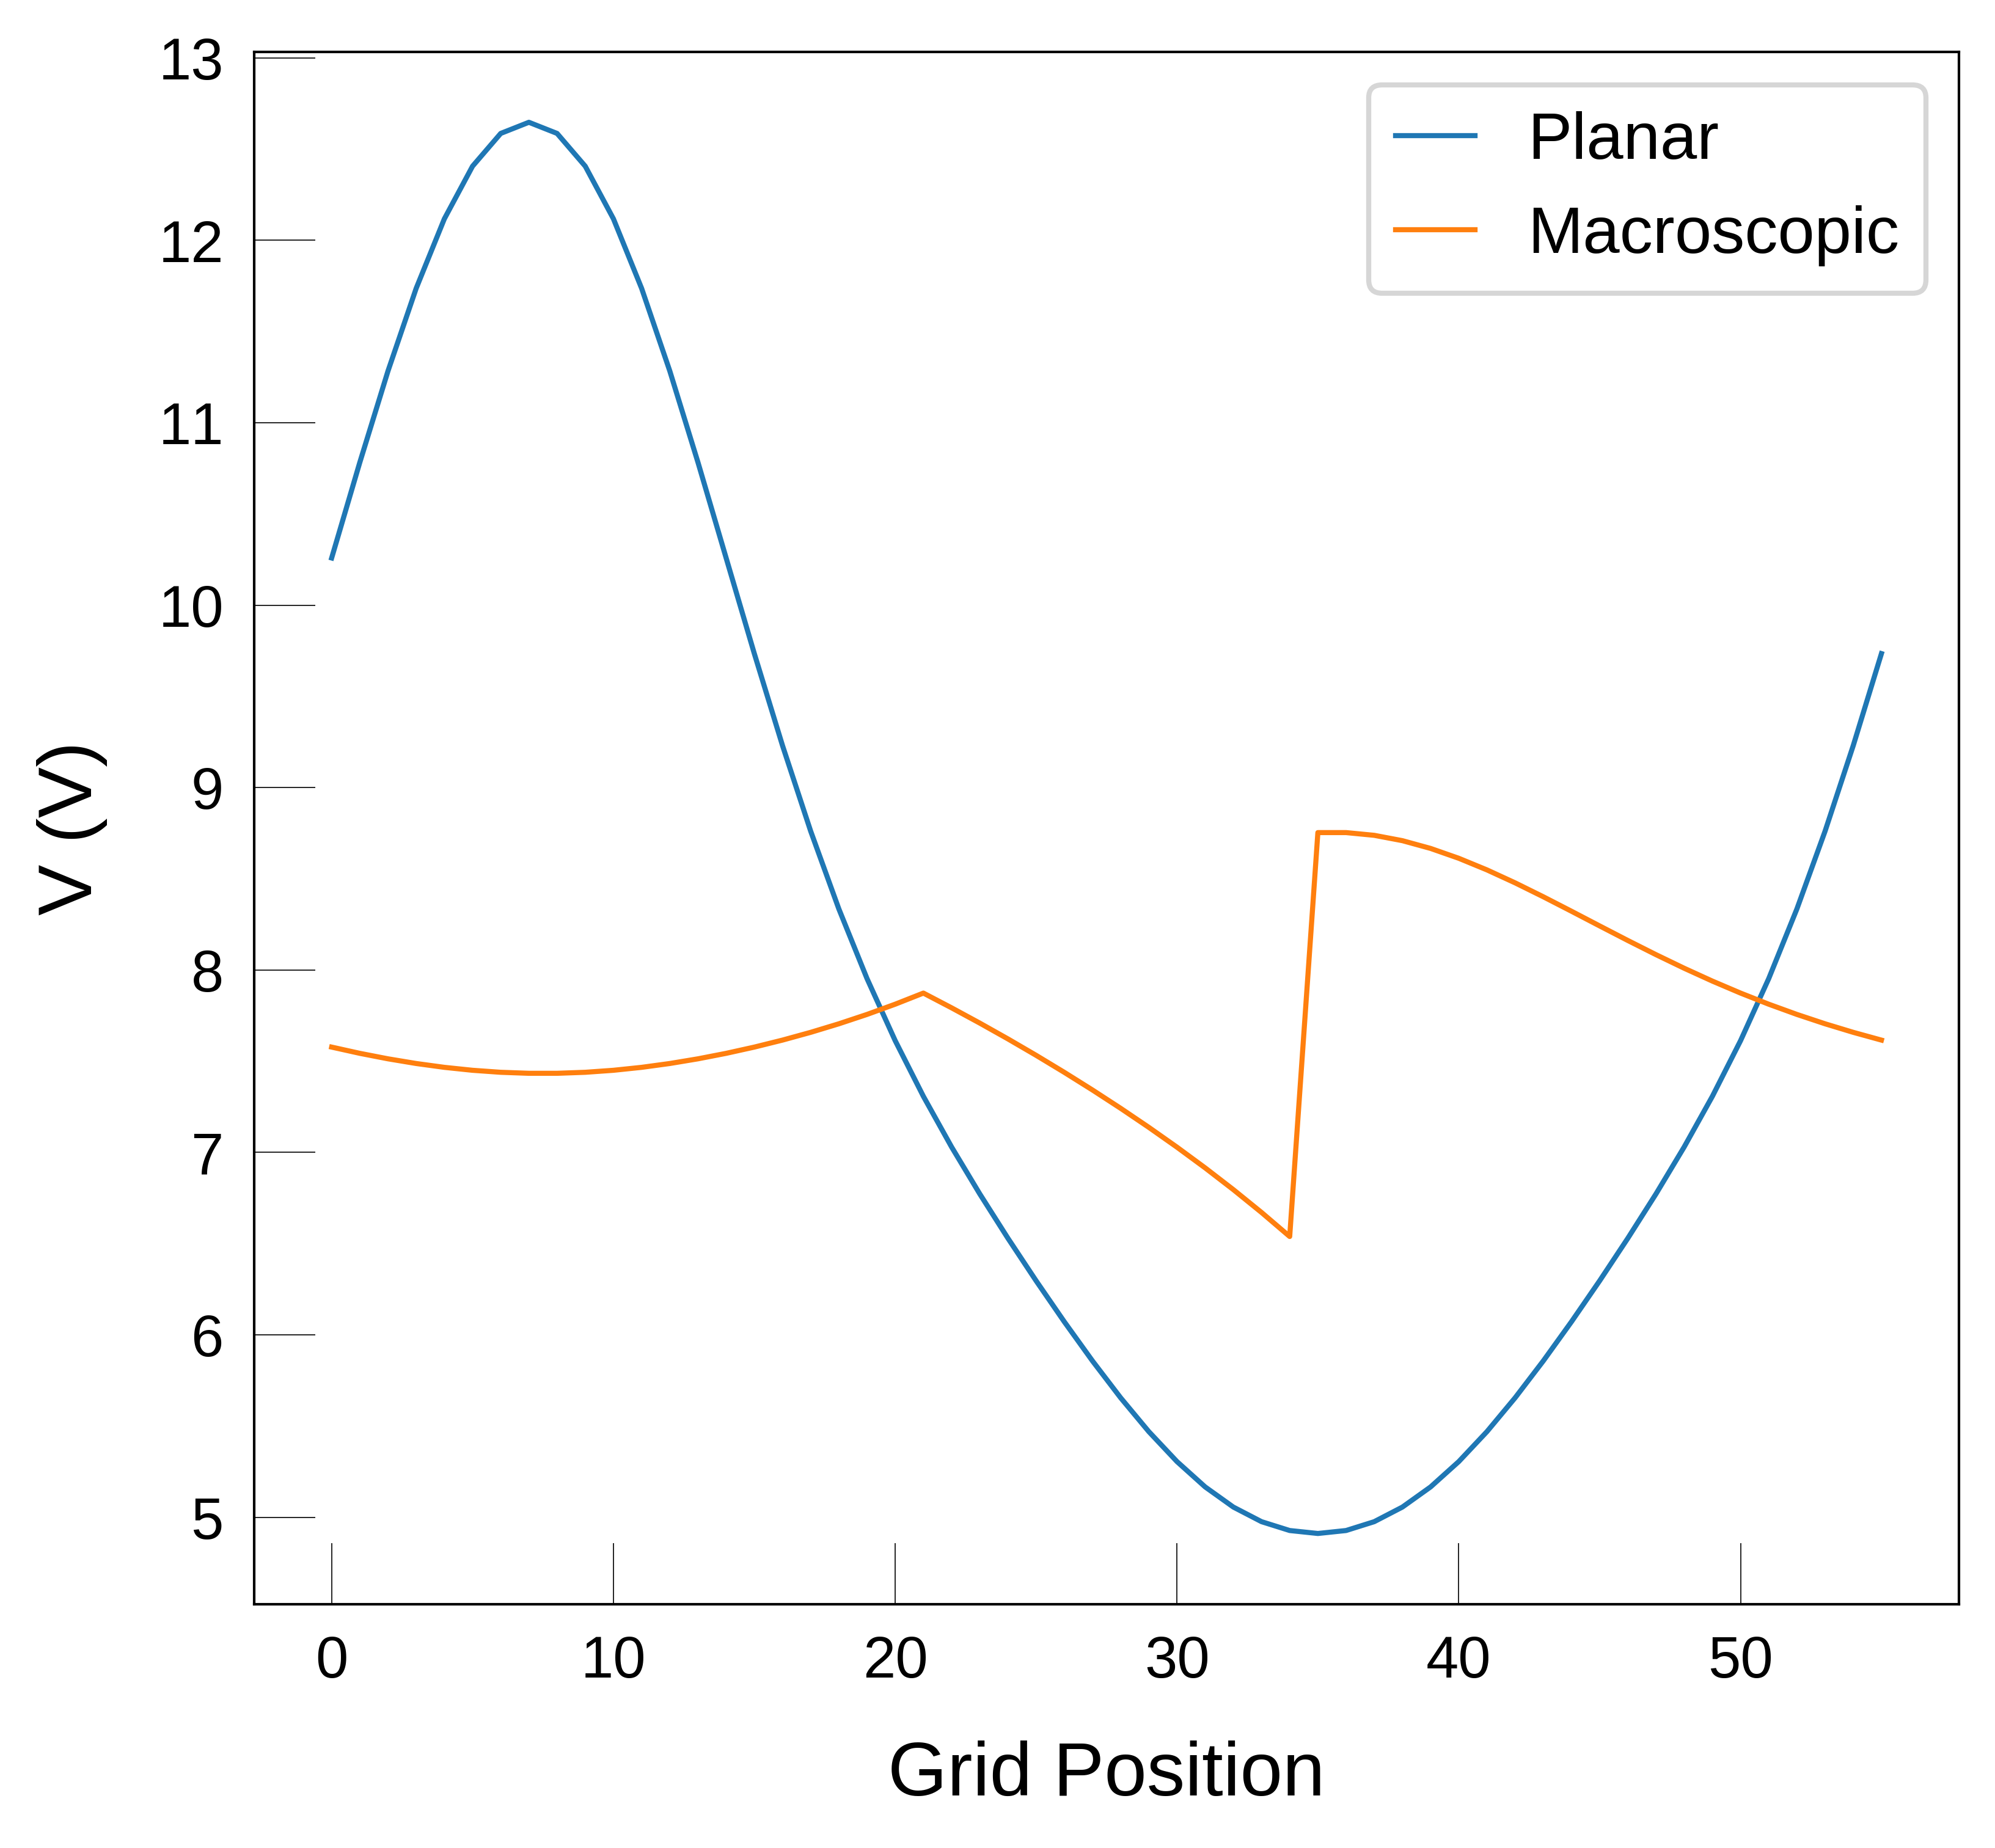

In [7]:
# Using the VASP CHGCAR file:
lattice_vector = 4.75
df, fig = md.plotting.plot_planar_average(
    input_file='CHGCAR.test',
    lattice_vector=lattice_vector,
    axis="z",
)

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  -4.0478731477833207e-13
Average of the average =  -0.07045532018119124


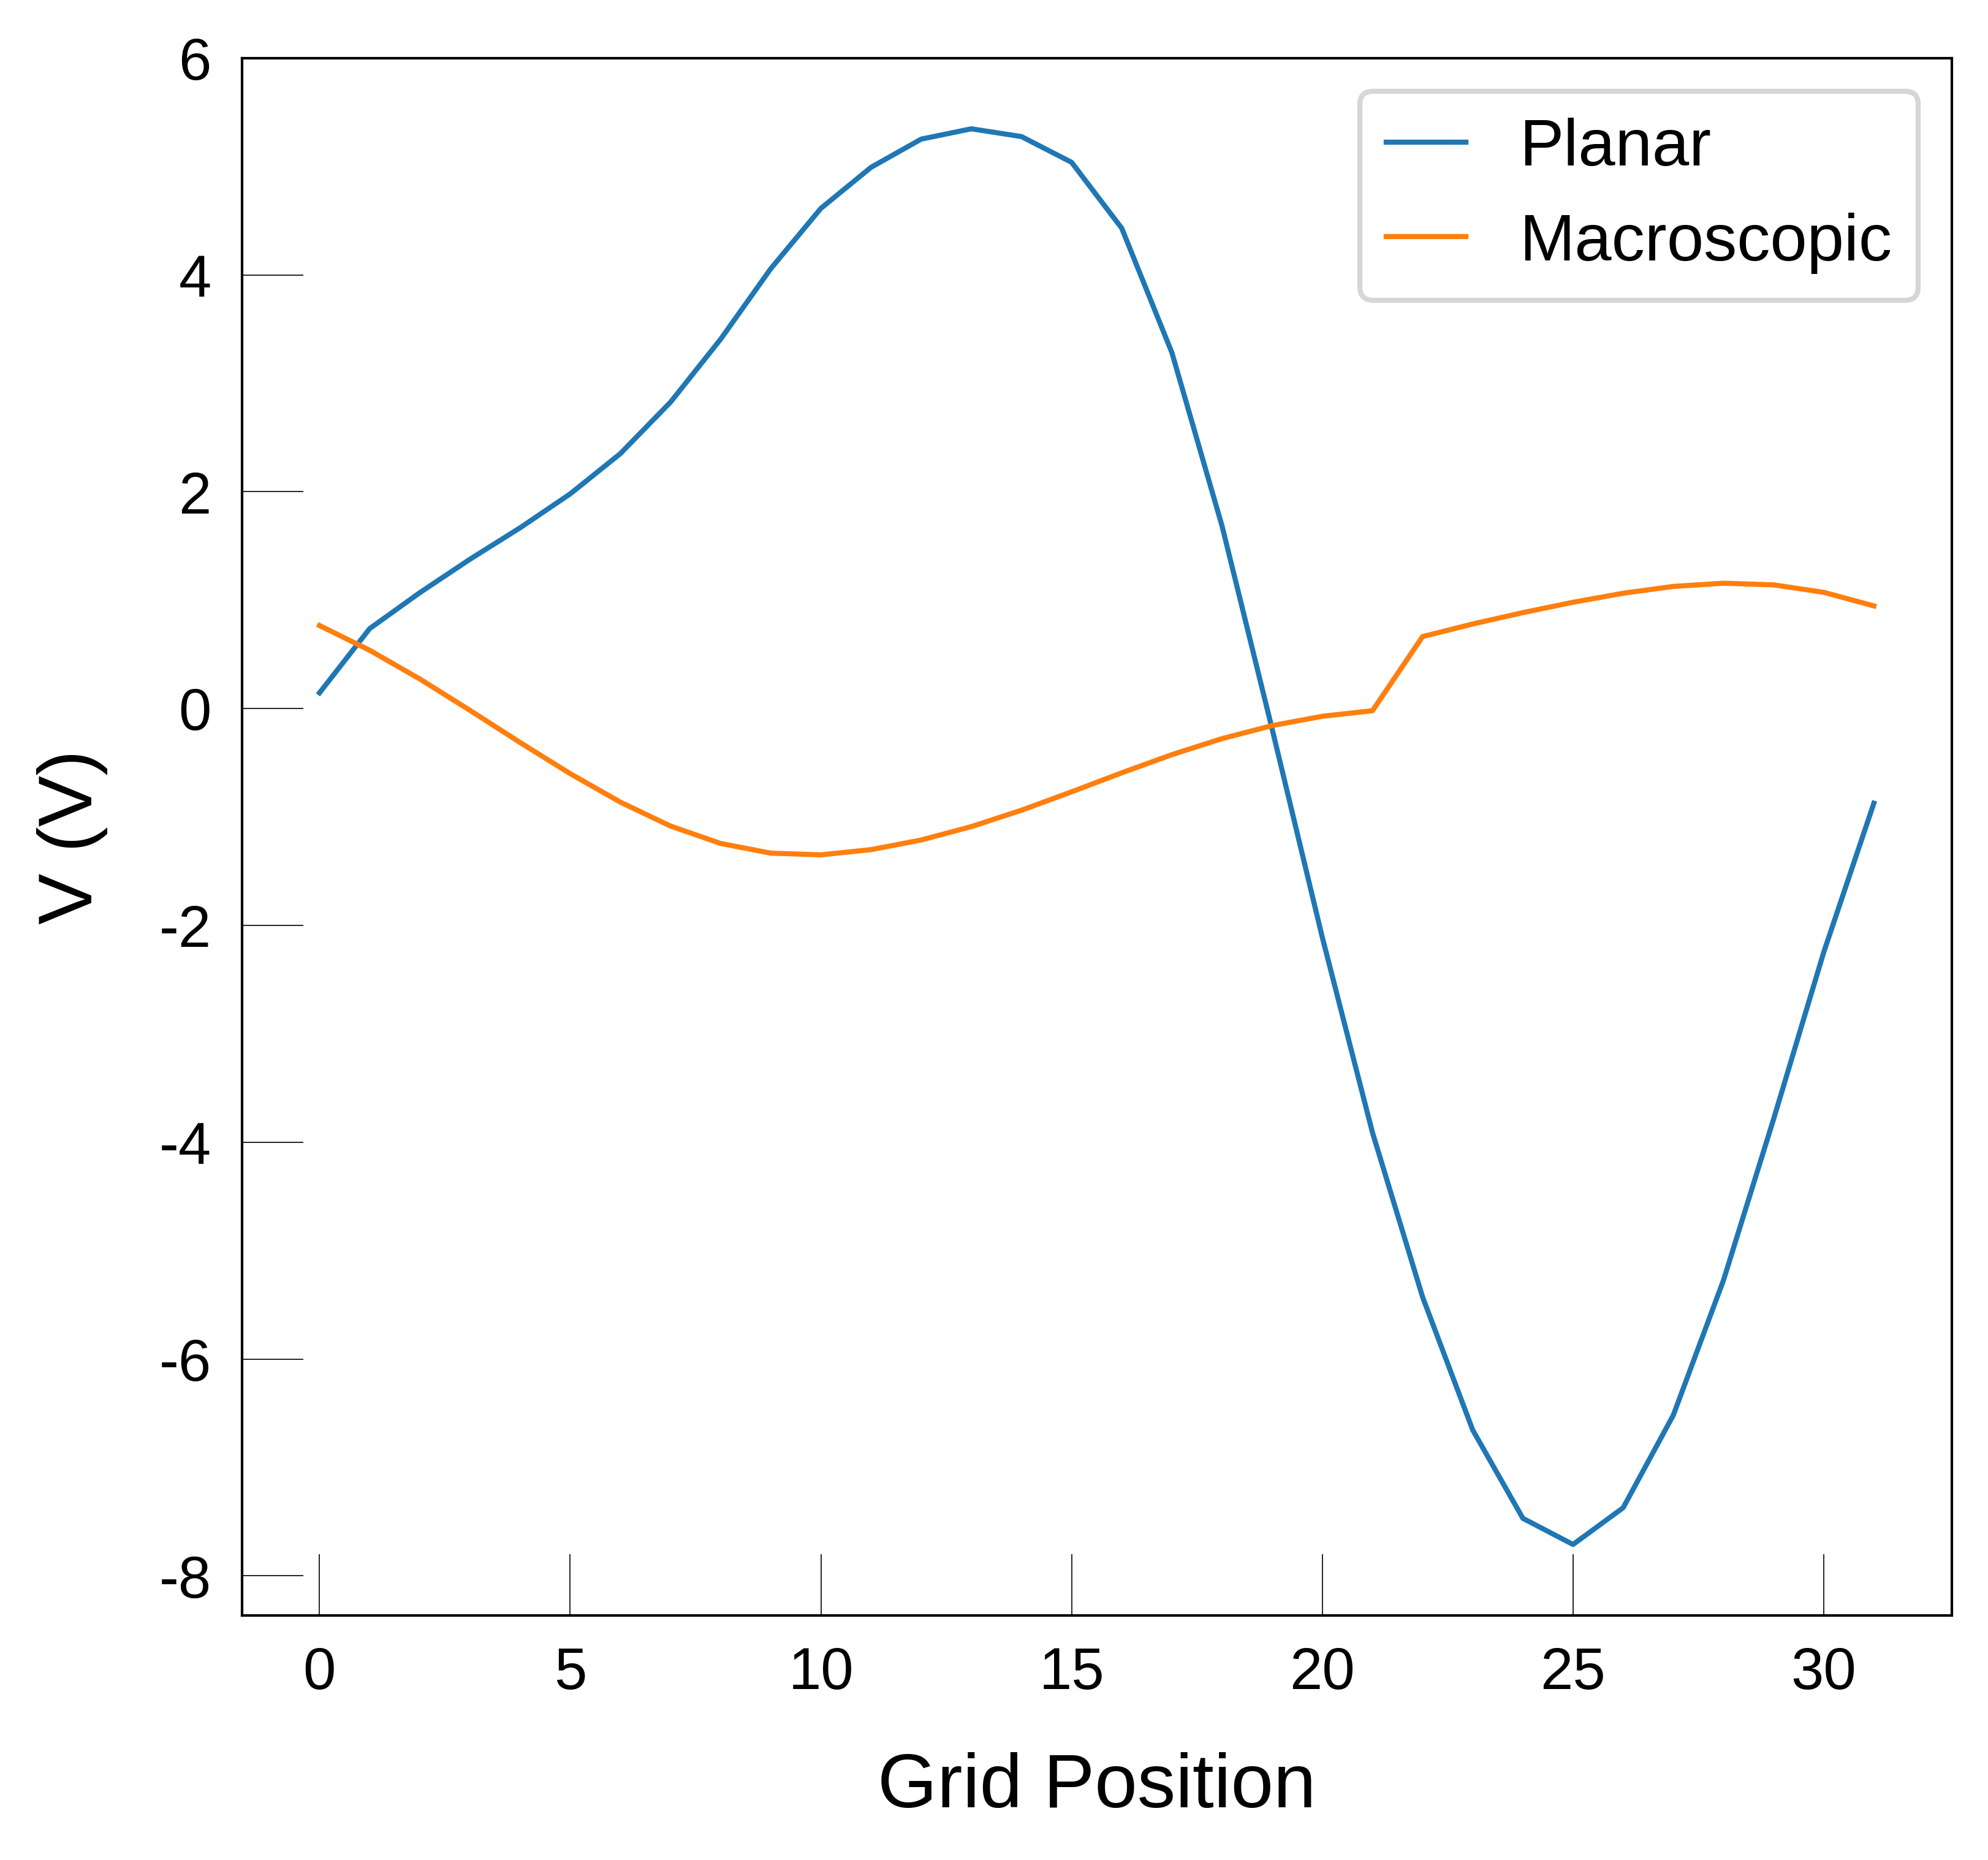

In [8]:
input_file = 'LOCPOT.test'
lattice_vector = 5.41
output_file = 'PlanarAverage.csv' 
img_file = 'PlanarAverage.png' 

df, fig = md.plot_planar_average(
    lattice_vector=lattice_vector, 
    input_file=input_file, 
    axis="z",
    output_file=output_file, # Save the data to a CSV file
    img_file=img_file # Save the image to a PNG file
)

### Post-processing a `cube` file

Average of the average =  0.004323820372140808


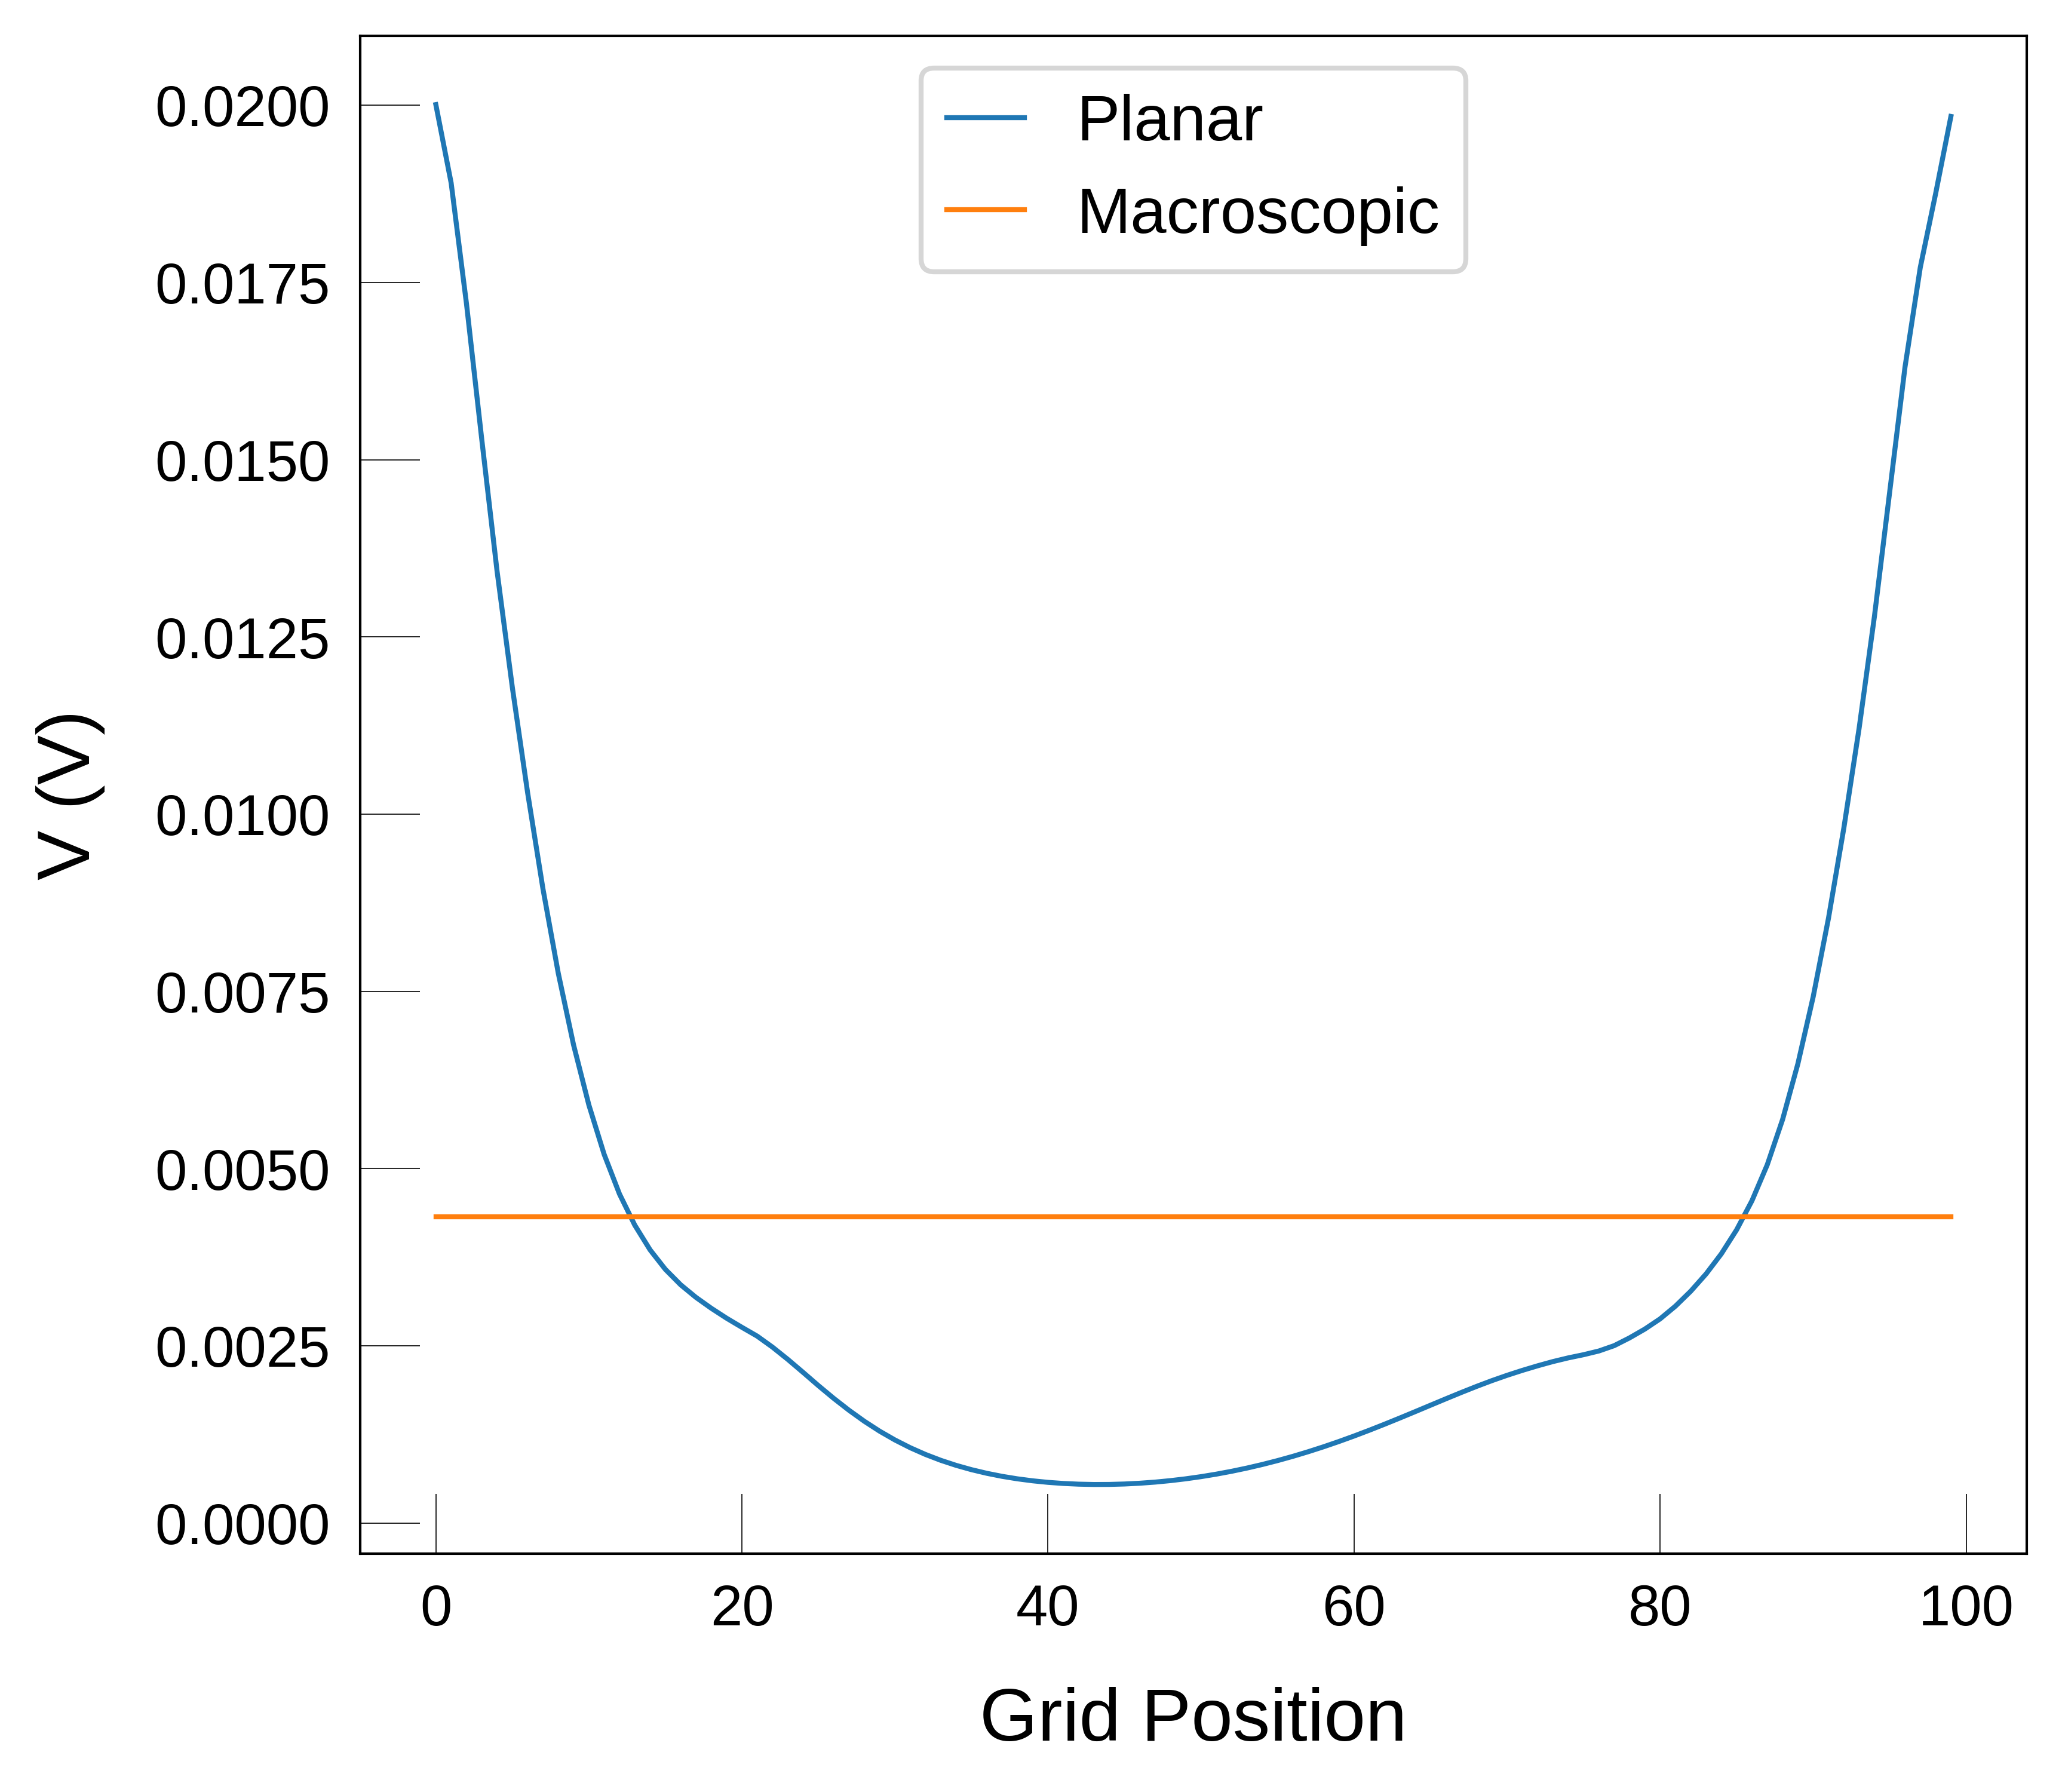

In [4]:
input_file = "cube_001_spin_density.cube"
lattice_vector = 4.75
output_file = 'PlanarCube.csv'
img_file = 'PlanarCube.png'

df, fig = md.plot_planar_average(
    lattice_vector=lattice_vector, 
    input_file=input_file, 
    output_file=output_file, 
    img_file=img_file
)

## Potential variation along a specified vector

We can plot how the electrostatic potential varies along a vector using the function `macrodensity.plotting.plot_variation_along_vector`:
This variation is calculated by moving a cube along the vector and calculating the potential average for each individual cube. 
To use the function, we have to define the vector, the cube size, origin point, magnitude and input file. 
This will return a figure showing the averaged electrostatic potential along the vector.

![](./movingcube.gif)

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  -4.0478731477833207e-13


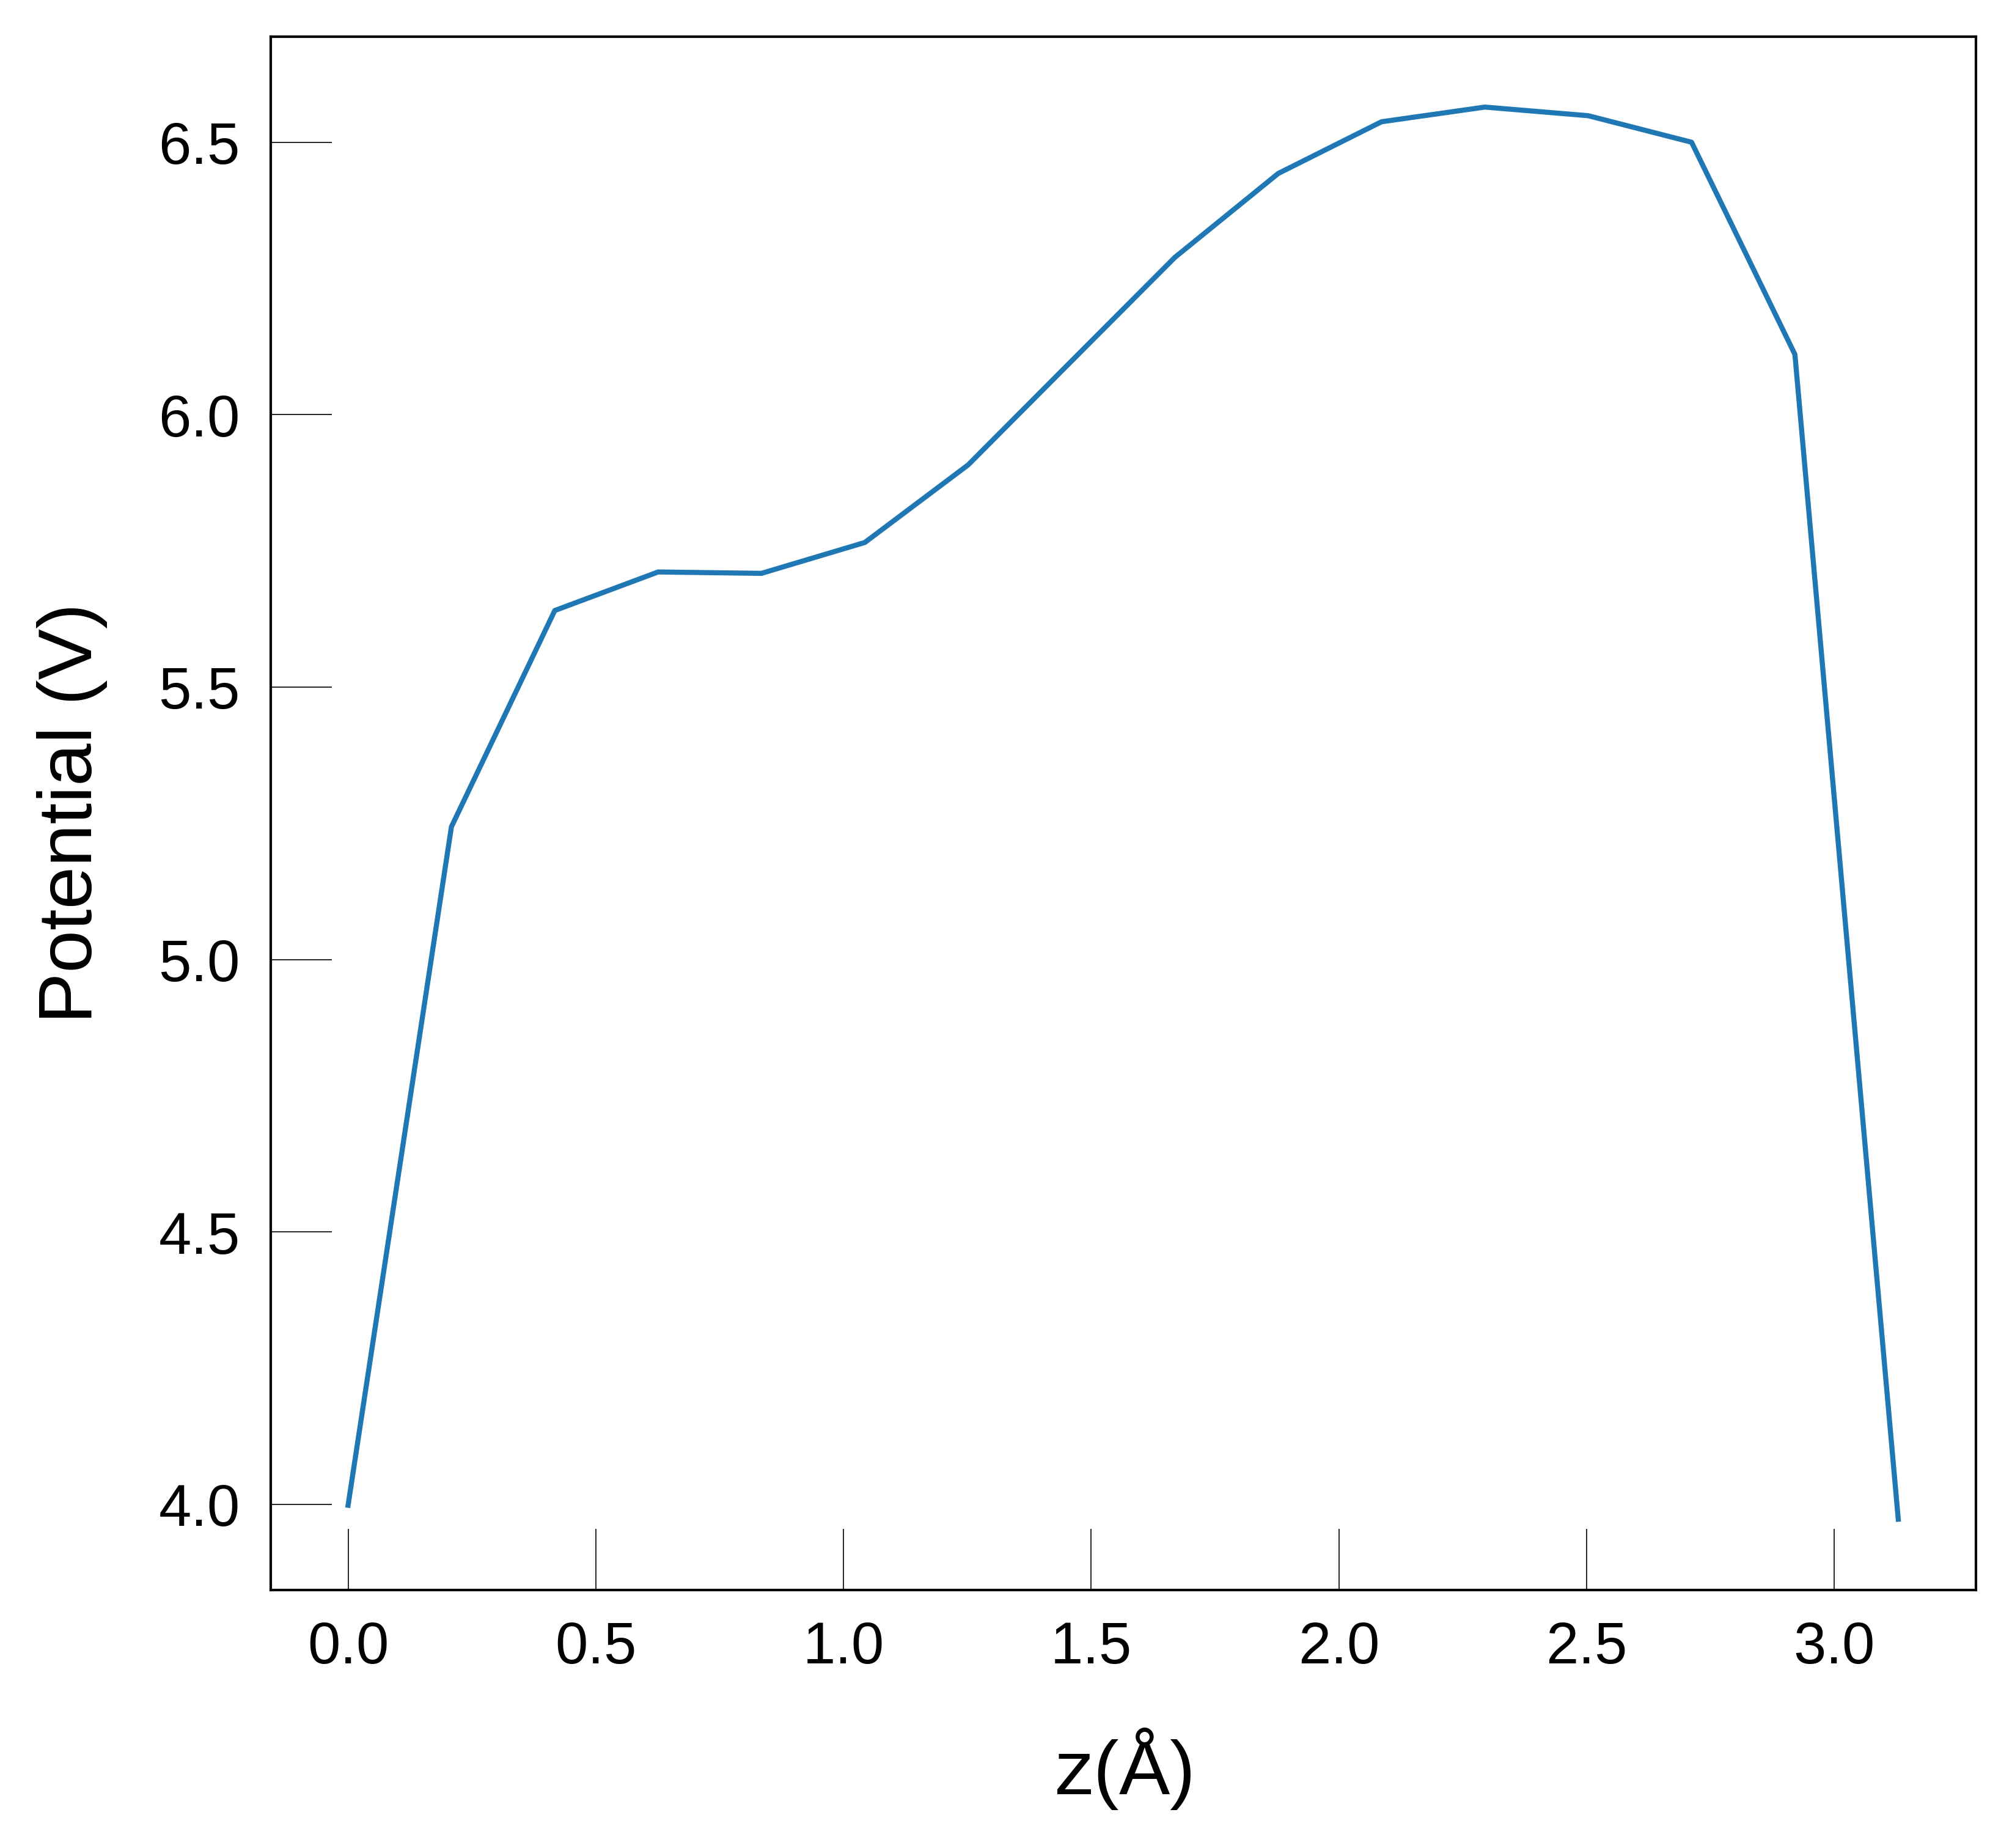

In [5]:
import macrodensity

vector = [1, 1, 1]
cube_size = [1, 1, 1]
origin_point = [0.17, 0.17, 0.17]
vector_magnitude = 16
input_file = 'LOCPOT.test'

fig = macrodensity.plotting.plot_variation_along_vector(
    cube_size=cube_size,
    origin_point=origin_point,
    vector=vector,
    vector_magnitude=vector_magnitude,
    input_file = 'LOCPOT.test',
    show_electric_field=False, # don't show variation of electric field
)

We can also show the variation of the electric field by setting `show_electric_field=True`:

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  -4.0478731477833207e-13


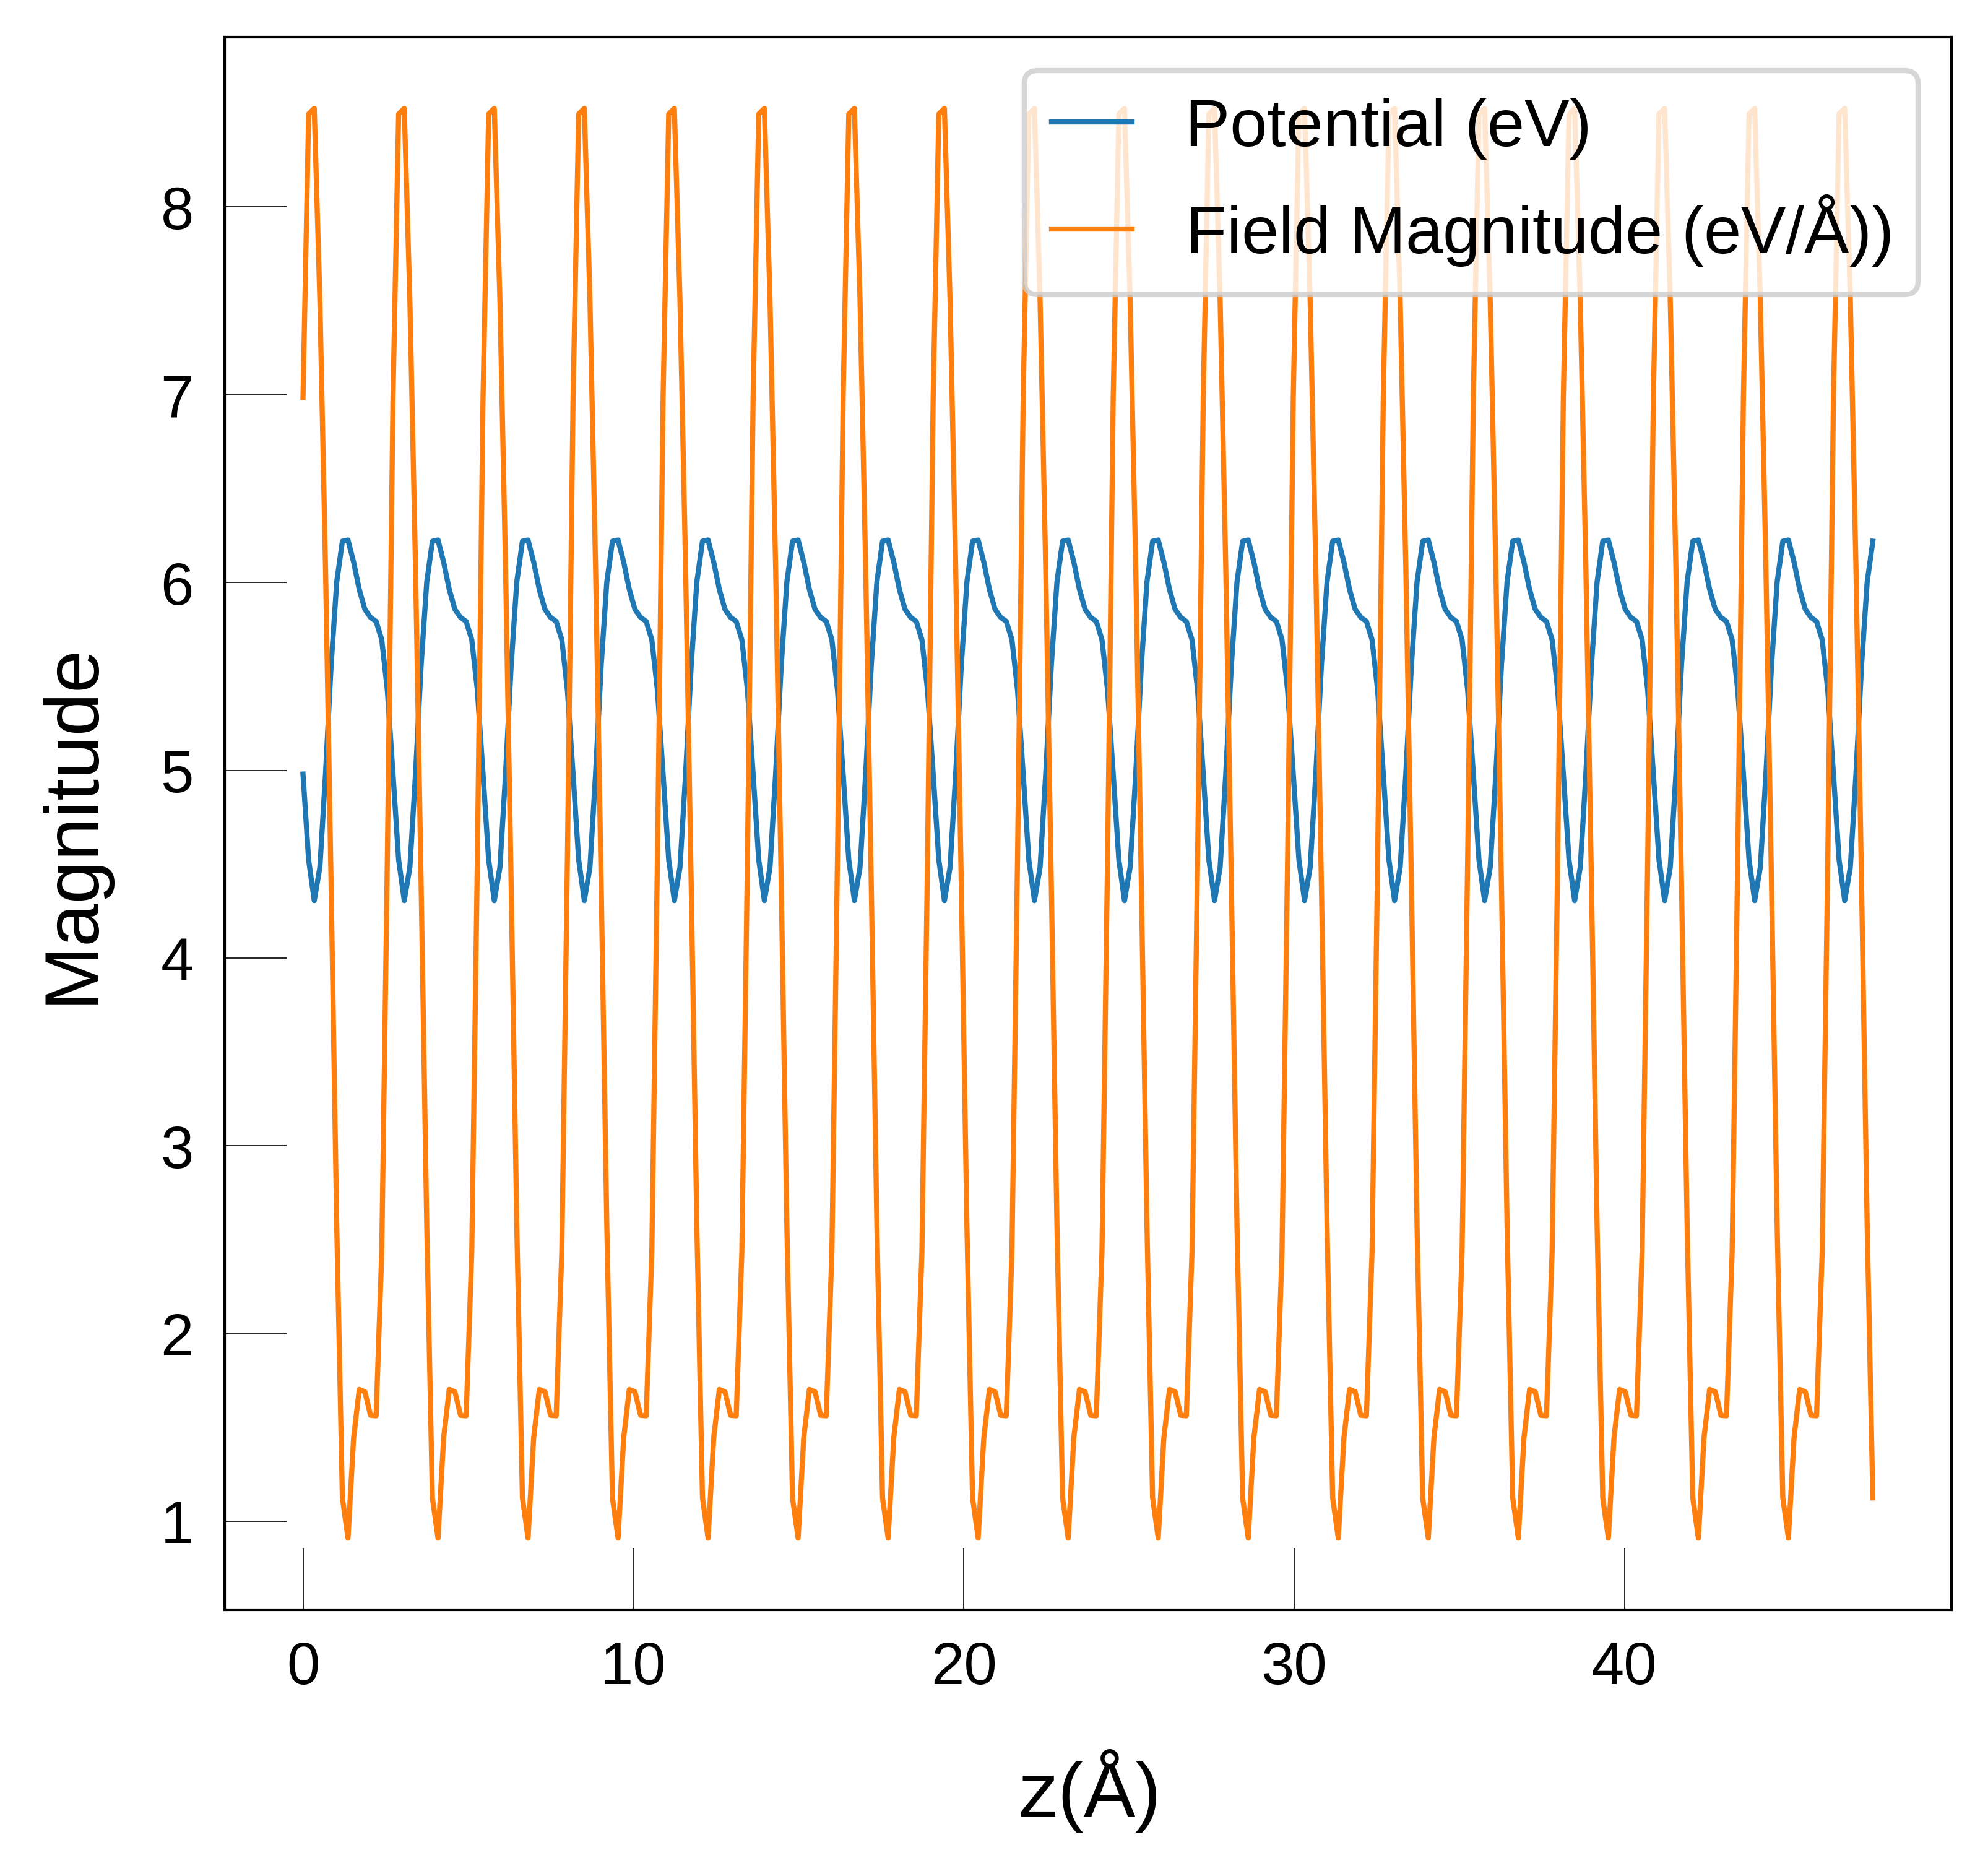

In [8]:
import macrodensity

input_file = 'LOCPOT.test'
cube_size = [2,2,2]
vector = [1,1,0]
origin_point = [0.5, 0, 0.5]
vector_magnitude = 280

fig = macrodensity.plot_variation_along_vector(
    input_file=input_file,
    cube_size=cube_size,
    vector=vector,
    origin_point=origin_point,
    vector_magnitude=vector_magnitude,
    show_electric_field=True
)

## Distinguishing plateau regions in the electrostatic potential

To detect plateau regions in the electrostatic potential of a material, we can use the function `macrodensity.plotting.plot_active_space`.
We need to specify the `cube size`, `cube origin` in fractional unit cell coordinates, a `tolerance` threshold for identifying plateaus, and an input `VASP LOCPOT` filename. 
This will print the percentage of cubes categorized as non-vacuum versus vacuum, providing insight into areas of consistent potential within the material. In addition, these areas will be plotted in a 3D plot as shown below:

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  -4.0478731477833207e-13
Number of vacuum cubes:  17
Number of non-vacuum cubes:  4079
Percentage of vacuum cubes:  0.4 %
Percentage of non-vacuum cubes:  99.6 %


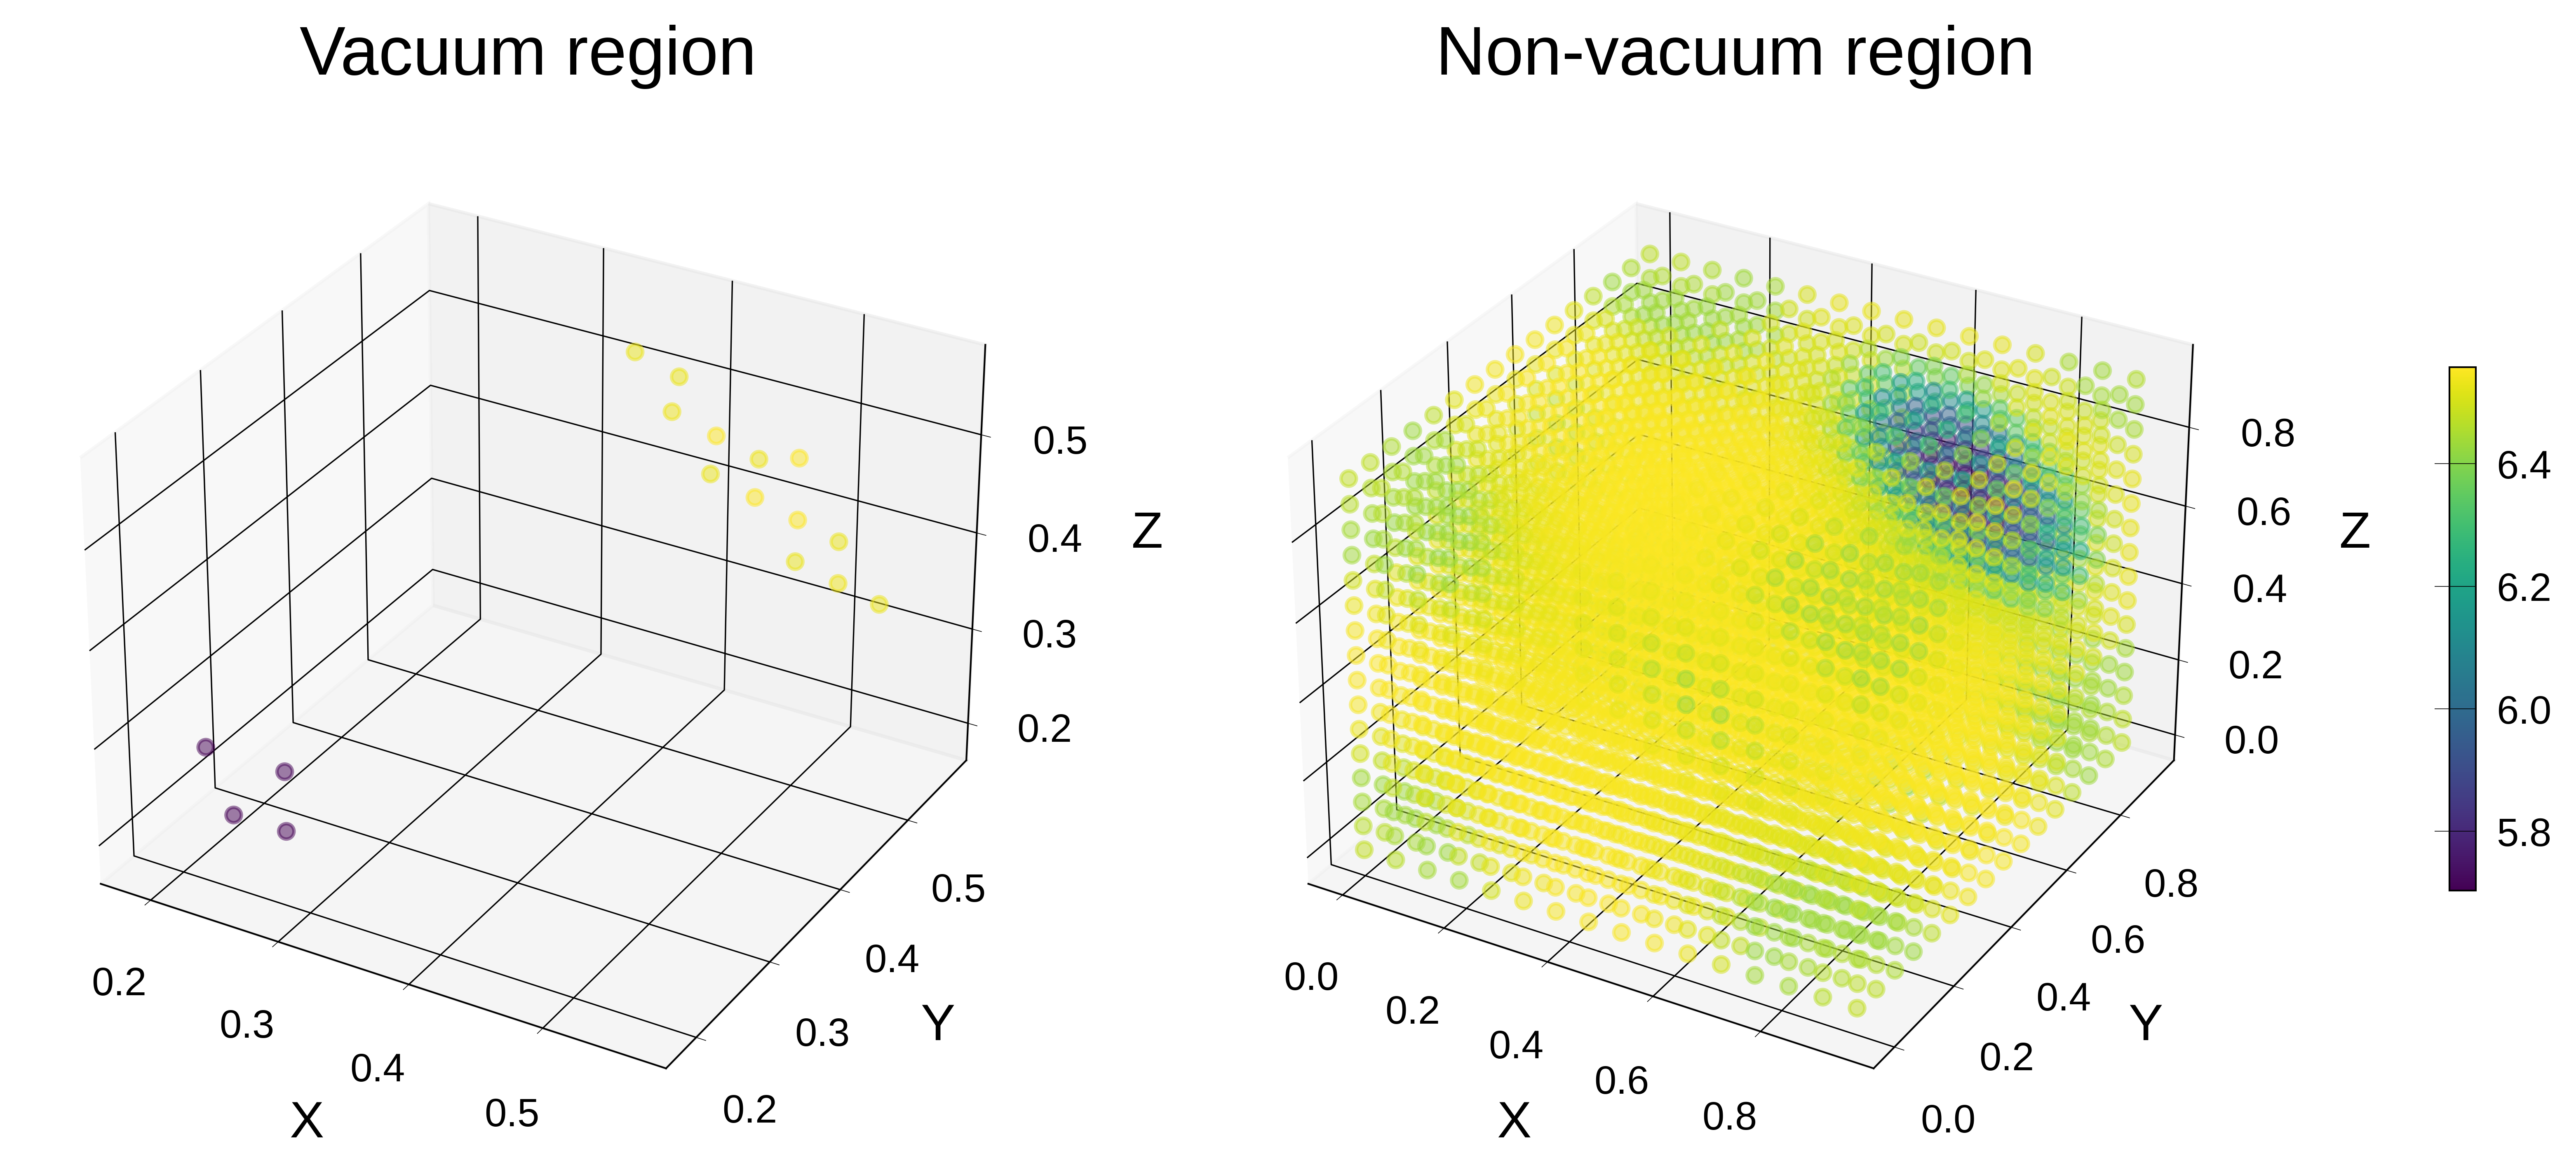

In [2]:
import macrodensity

input_file = "LOCPOT.test"
cube_size = [2, 2, 2]
cube_origin = [0.5, 0.5, 0.5]
tolerance = 1E-4

fig_vacuum = macrodensity.plotting.plot_active_space(
    input_file=input_file,
    cube_size=cube_size,
    cube_origin=cube_origin,
    tolerance=tolerance,
    print_output=True,
)

## Plotting the Onsite (Hartree) Potential 

We can plot the on-site electrostatic potential for a specific species using the function `macrodensity.plotting.plot_on_site_potential`:

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  -4.0478731477833207e-13


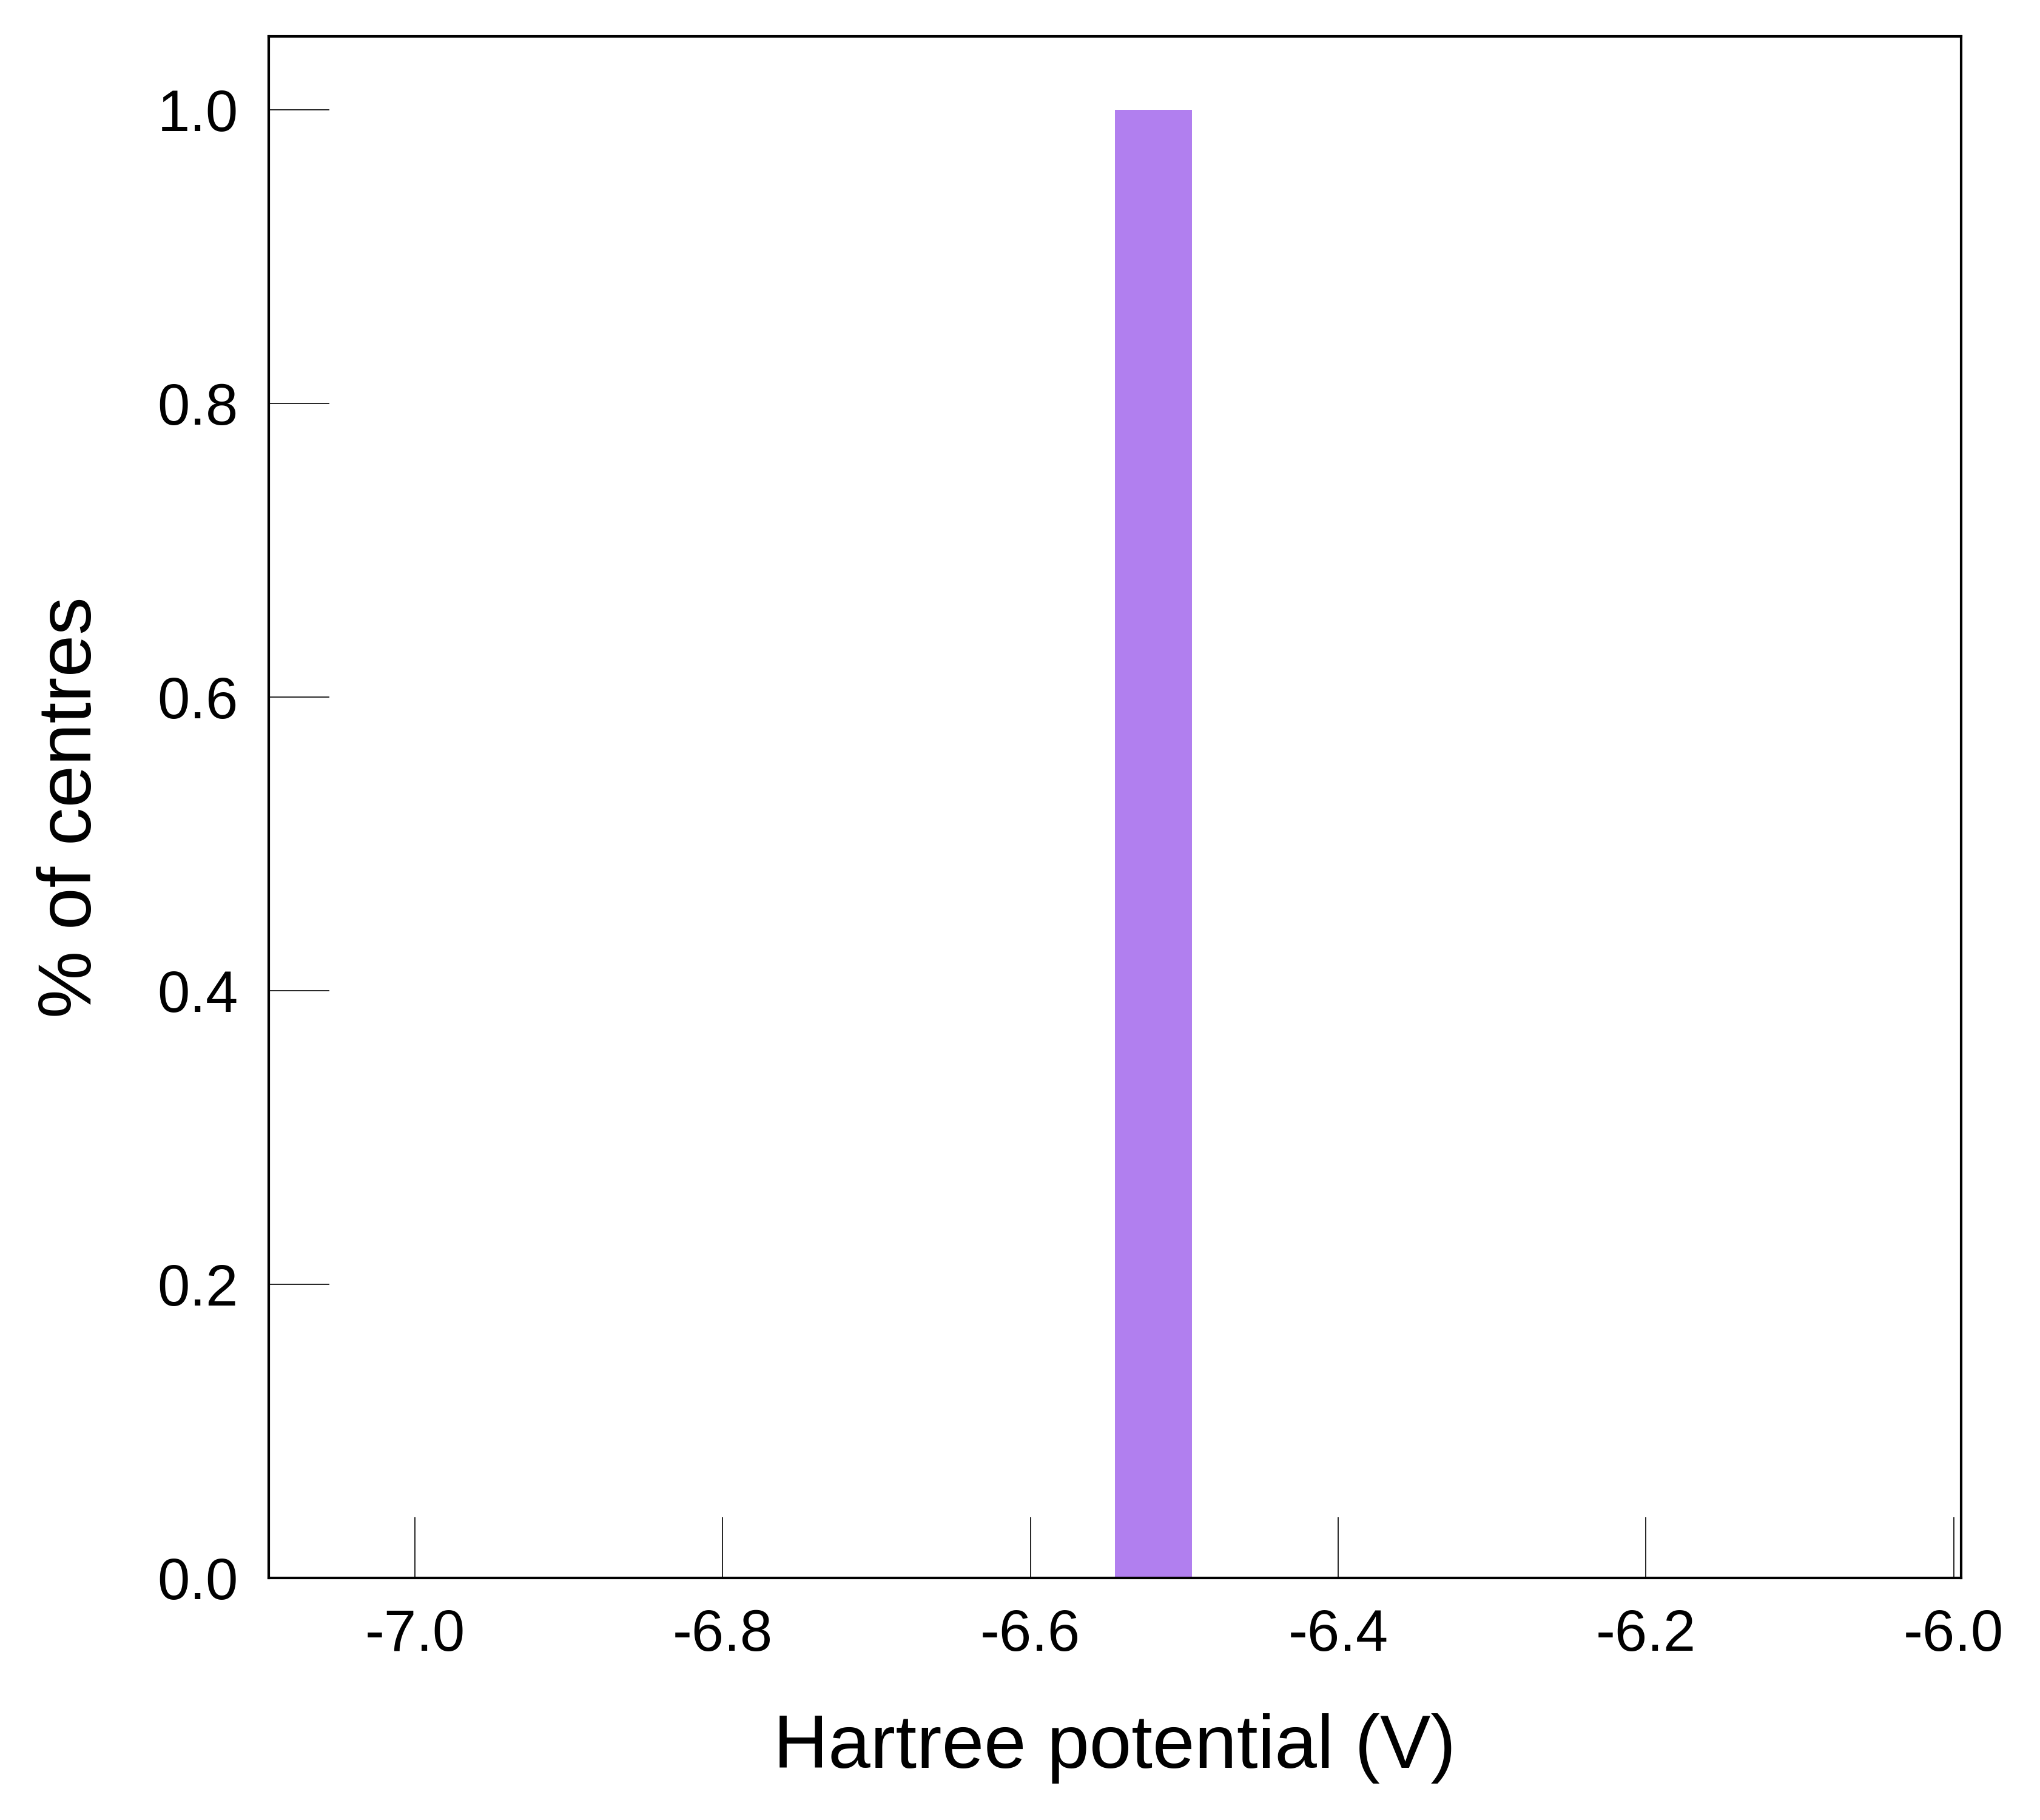

In [12]:
import macrodensity

## INPUT SECTION
potential_file = 'LOCPOT.test'
coordinate_file = 'POSCAR.test'
species = "Zn"
sample_cube = [5, 5, 5]

df, fig = macrodensity.plotting.plot_on_site_potential(
    species=species,
    potential_file=potential_file,
    coordinate_file=coordinate_file,
    sample_cube=sample_cube,
)

## Calculating the Spherical Average around a given point in a material

To analyse the distribution of the potential within defined spatial regions, we can calculate the spherical average of the potential around a given point by defining a cube around that point.

To do this, we define the `cube size`, `origin point`, and `input file` and feed them to the function `macrodensity.tools.spherical_average`. The output is the averaged potential distribution within the defined cube region.

In [10]:
from macrodensity.tools import spherical_average

cube_size = [2, 2, 2]
cube_origin = [0.5, 0.5, 0.5]
input_file = 'LOCPOT.test'

cube_pot, cube_var = spherical_average(
    cube_size=cube_size,
    cube_origin=cube_origin,
    input_file='LOCPOT.test'
)

Reading header information...
Reading 3D data using Pandas...
Average of the potential =  -4.0478731477833207e-13
Potential            Variance
--------------------------------
6.5579496029375     1.8665165271901357e-05


## Aligning band edges to reference potentials

To align the band edges of a material to the reference potential within its interstitial regions, we can use the function `macrodensity.tools.bulk_interstitial_alignment`. For this, we need to specify the positions of interstitial spaces, the `VASP OUTCAR` and `LOCPOT` filenames, and the size of a cube defined by `LOCPOT` FFT mesh points. The function's output consists of the aligned valence band, aligned conduction band, and variances within the interstitial regions.

In [23]:
import macrodensity

interstices = ([0.5,0.5,0.5], [0.25,0.25,0.25])
outcar = 'OUTCAR.test'
locpot = 'LOCPOT.test'
cube_size = [2,2,2]

# First we print the band edges before alignment
VB_eigenvalue, CB_eigenvalue = macrodensity.io.get_band_extrema(outcar)
print(f"Band edges before alignment: {VB_eigenvalue} eV; {CB_eigenvalue} eV")

# Aligning the band edges
print("\nAligning the band edges...")
VB_eigenvalue, CB_eigenvalue, interstitial_variance = macrodensity.tools.bulk_interstitial_alignment(
    interstices=interstices,
    outcar=outcar,
    locpot=locpot,
    cube_size=cube_size,
    print_output=False,
)
print(f"\nBand edges after alignment: {VB_eigenvalue} eV; {CB_eigenvalue} eV")

Band edges before alignment: 2.8952 eV; 4.411 eV

Aligning the band edges...
Reading header information...
Reading 3D data using Pandas...

Band edges after alignment: -3.24 eV; -1.72 eV
